In [3]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [4]:
data =r"C:\Users\Khushi\Downloads\data.csv"

df = pd.read_csv(data)

In [5]:
df.shape

(175, 2)

In [6]:
df.head()

,year,anomaly
0,1850,-0.08
1,1851,-0.14
2,1852,0.12
3,1853,0.01
4,1854,-0.06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     175 non-null    int64  
 1   anomaly  175 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     175 non-null    int64  
 1   anomaly  175 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [9]:
df.head(10)

,year,anomaly
0,1850,-0.08
1,1851,-0.14
2,1852,0.12
3,1853,0.01
4,1854,-0.06
5,1855,-0.06
6,1856,-0.02
7,1857,-0.19
8,1858,-0.17
9,1859,-0.03


In [10]:
df.dtypes

year         int64
anomaly    float64
dtype: object

In [11]:
df['year'] = pd.to_datetime(df['year'],format = '%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     175 non-null    datetime64[ns]
 1   anomaly  175 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [14]:
df.set_index('year', inplace=True)
df.index

DatetimeIndex(['1850-01-01', '1851-01-01', '1852-01-01', '1853-01-01',
               '1854-01-01', '1855-01-01', '1856-01-01', '1857-01-01',
               '1858-01-01', '1859-01-01',
               ...
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01', '2024-01-01'],
              dtype='datetime64[ns]', name='year', length=175, freq=None)

In [15]:
df.dtypes

anomaly    float64
dtype: object

In [18]:
y=df['anomaly'].resample('D').mean()

y.head(10)

year
1850-01-01   -0.08
1850-01-02     NaN
1850-01-03     NaN
1850-01-04     NaN
1850-01-05     NaN
1850-01-06     NaN
1850-01-07     NaN
1850-01-08     NaN
1850-01-09     NaN
1850-01-10     NaN
Freq: D, Name: anomaly, dtype: float64

In [19]:
y.isnull().sum()

np.int64(63378)

In [23]:
y.isnull().sum()

np.int64(0)

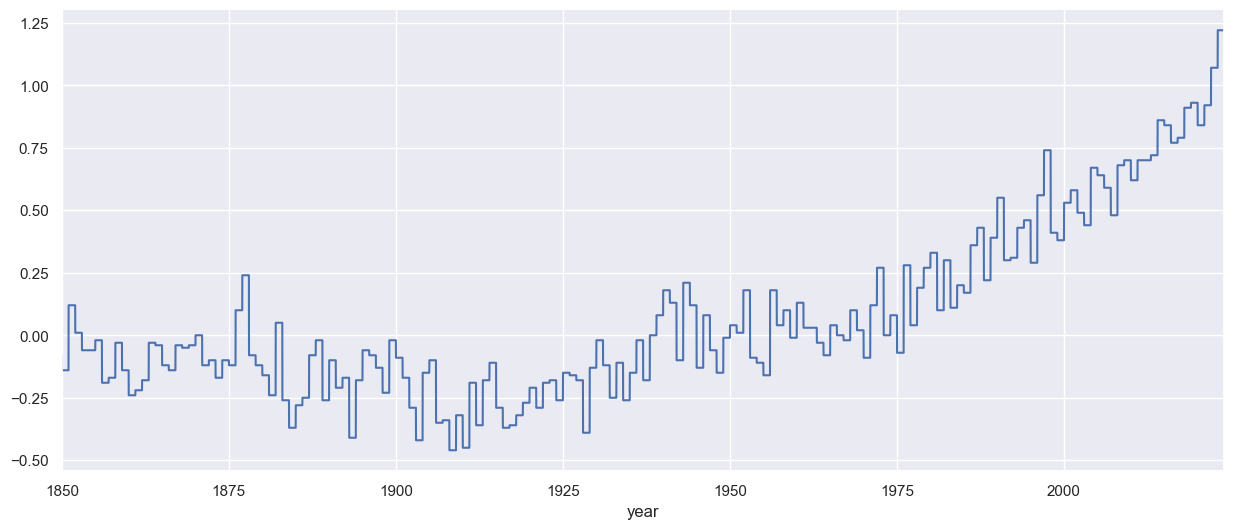

In [24]:
y.plot(figsize=(15, 6))

plt.show()

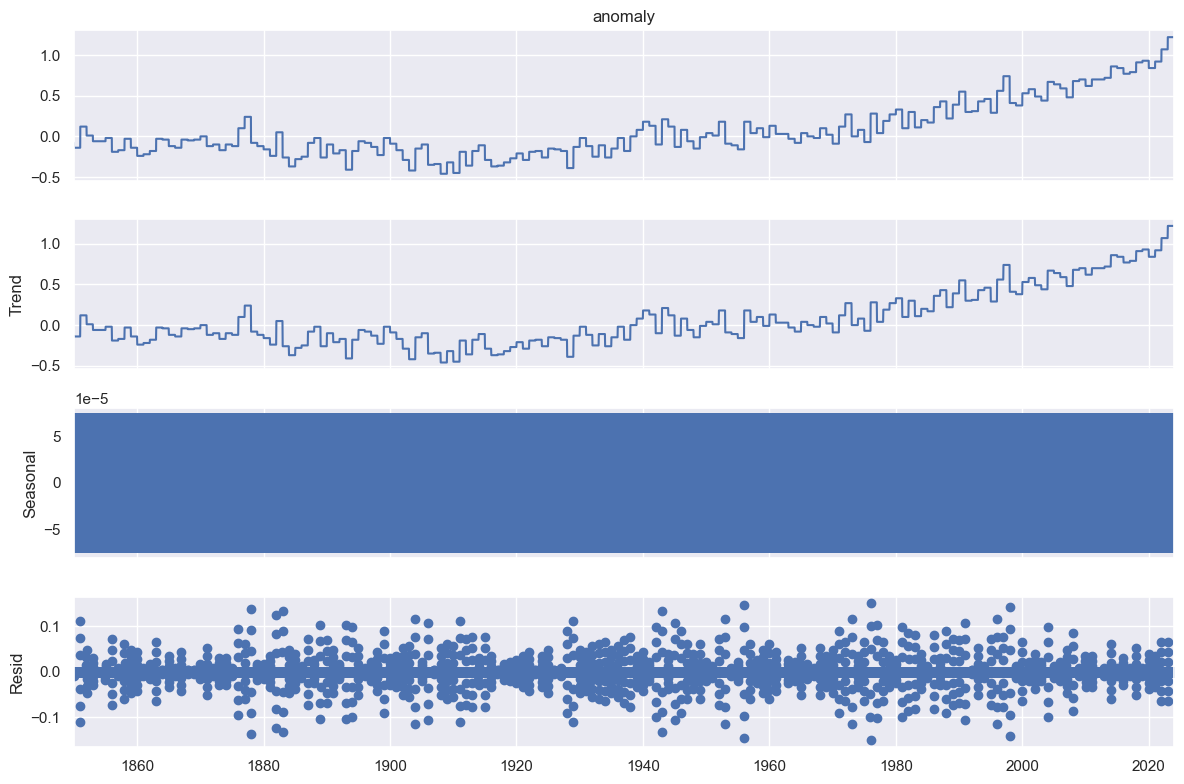

In [25]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()

plt.show()

In [34]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA are as follows:-')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA are as follows:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [29]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:46971.60098231099
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:-37260.3450909798
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:-353739.09305018745
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:-353710.8270905779
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:-353737.56153972197
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:-353745.1076653223
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:-353717.39356666565
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:-353708.8270908027
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:-39206.721303946804
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:-121958.77988001474
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:-397790.38508479466
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:-397842.33189343836
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:-397812.9011234173
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:-397817.81297181087
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:-397818.0385925471
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:-398239.04393913323
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:-441859.1822786503
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:-441825.37414747145
ARIMA(0, 1, 0)x(0, 1

In [30]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.959e-07      0.106   1.84e-06      1.000      -0.209       0.209
ma.L1      -2.792e-06      0.114  -2.46e-05      1.000      -0.223       0.223
ma.S.L4       -1.0000      0.306     -3.269      0.001      -1.600      -0.400
sigma2      5.588e-05   1.71e-05      3.263      0.001    2.23e-05    8.95e-05


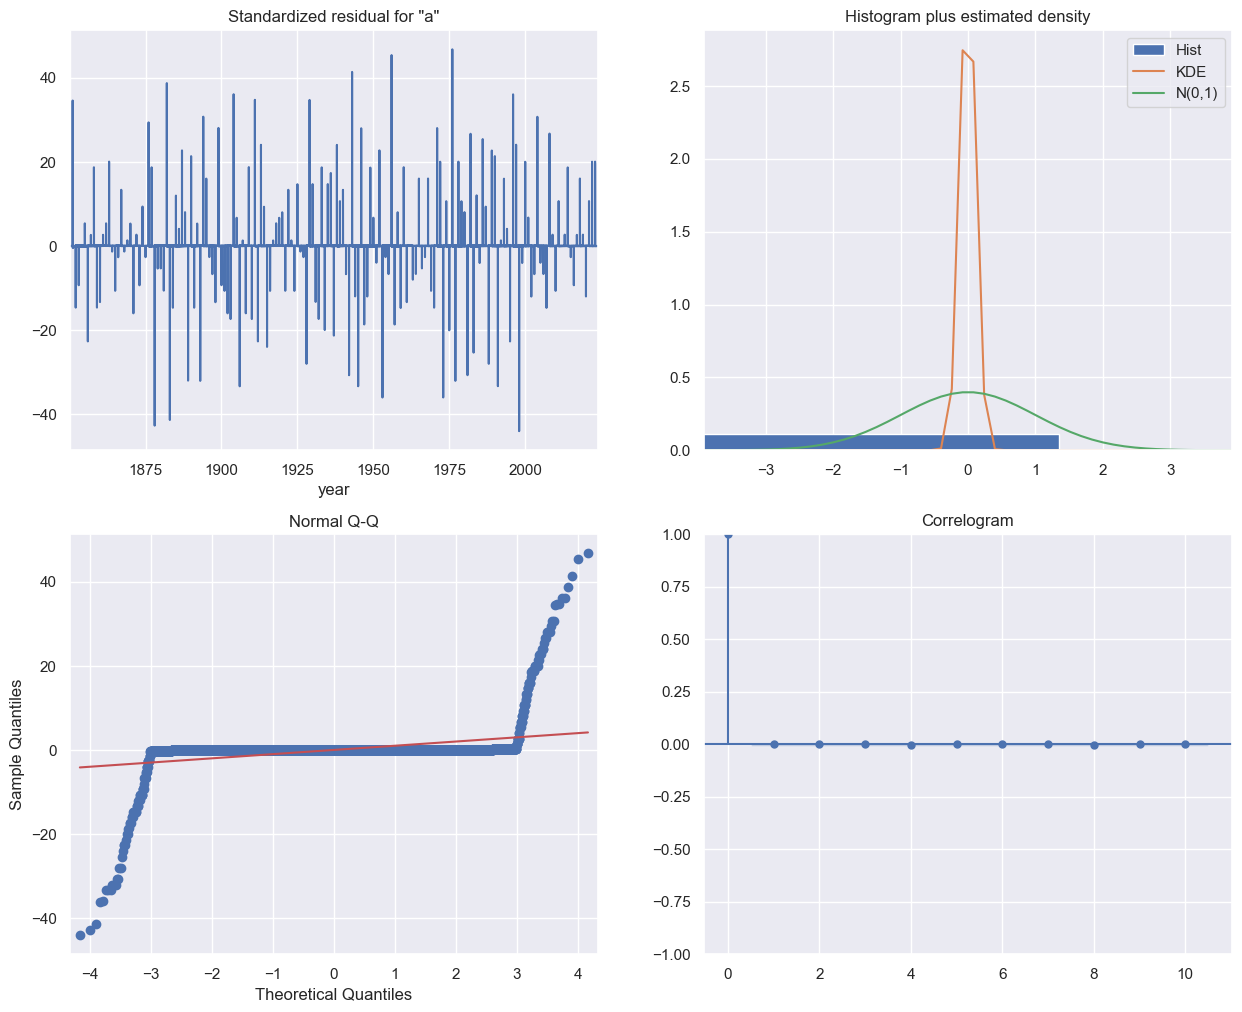

In [35]:
results.plot_diagnostics(figsize=(15, 12))

plt.show()

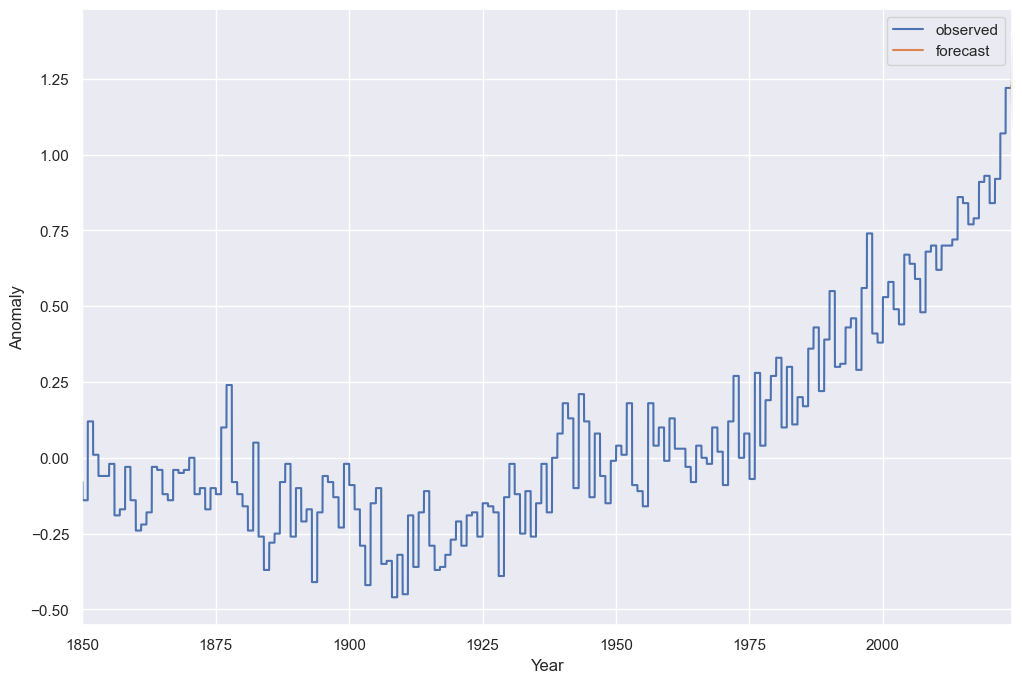

In [36]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(12, 8))

pred_uc.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('Anomaly')

plt.legend()
plt.show()